# Term Project
<h3>Ahmet Nasuhcan ÜNLÜ 171805062 <br>
Ozan İrfan BAYAR 171805041<br>
İlker MAVİLİ 181805084</h3>

In [ ]:
    # Term Project\n"
    <h3>Ahmet Nasuhcan ÜNLÜ 171805062 <br>
    Ozan İrfan BAYAR 171805041<br>
    İlker MAVİLİ 181805084</h3>

In [10]:
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import collections

conf=SparkConf().setMaster("local[*]").setAppName("MyApp")
sc = SparkContext.getOrCreate(conf=conf) 

In [11]:
import socket
import platform
hostname = socket.gethostname()
ip = socket.gethostbyname(hostname)
uname = platform.uname()
print("="*40, "System Information", "="*40)
print(f"Hostname: {hostname}")
print(f"Ip address: {ip}")
print(f"System: {uname.system}")
print(f"Release: {uname.release}")
print(f"Version: {uname.version}")
print(f"Machine: {uname.machine}")
print(f"Processor: {uname.processor}")

======================================== System Information ========================================
Hostname: Ahmets-MacBook-Pro.local
Ip address: 127.0.0.1
System: Darwin
Release: 21.2.0
Version: Darwin Kernel Version 21.2.0: Sun Nov 28 20:28:41 PST 2021; root:xnu-8019.61.5~1/RELEASE_ARM64_T6000
Machine: arm64
Processor: arm


In [12]:
#Declerations of DataFrames
dfUser = sc.textFile("/Users/anunlu/Downloads/BX-CSV-Dump/BX-Users.csv")
dfBooks = sc.textFile("/Users/anunlu/Downloads/BX-CSV-Dump/BX-Books.csv")
dfRatings = sc.textFile("/Users/anunlu/Downloads/BX-CSV-Dump/BX-Book-Ratings.csv")

In [13]:
#Split DF's for each fields
users_fields = dfUser.map(lambda lines: lines.replace('"','').split(";"))
books_fields = dfBooks.map(lambda lines: lines.replace('"','').split(";"))
rating_fields = dfRatings.map(lambda lines: lines.replace('"','').split(";"))

In [14]:
#USERS Fields
users_id = users_fields.map(lambda field: field[0])
users_city = users_fields.map(lambda field: field[1])
users_age = users_fields.map(lambda field: field[2])

#BOOKS Fields 
books_isbn = books_fields.map(lambda field: field[0])
books_name = books_fields.map(lambda field: field[1])
books_writer = books_fields.map(lambda field: field[2])
books_press = books_fields.map(lambda field: field[3])

#BOOK Rating Fields
rating_users_id = rating_fields.map(lambda field: field[0])
rating_books_isbn = rating_fields.map(lambda field: field[1])
rating_books_score = rating_fields.map(lambda field: field[2])


In [15]:
#Data Correction for Bad Data in Ages
def handle_age(age):
    try:
        return int(age)
    except:
        return int(300)

In [16]:
age_list = users_age.map(lambda item: handle_age(item))
age_list_filtered = age_list.filter(lambda item: item <= 90 and item >=0 )
age_counts = collections.OrderedDict(sorted(age_list_filtered.countByValue().items()))

age_list_filtered.stats()

(count: 167666, mean: 34.54562045972328, stdev: 13.769988967606256, max: 90.0, min: 0.0)

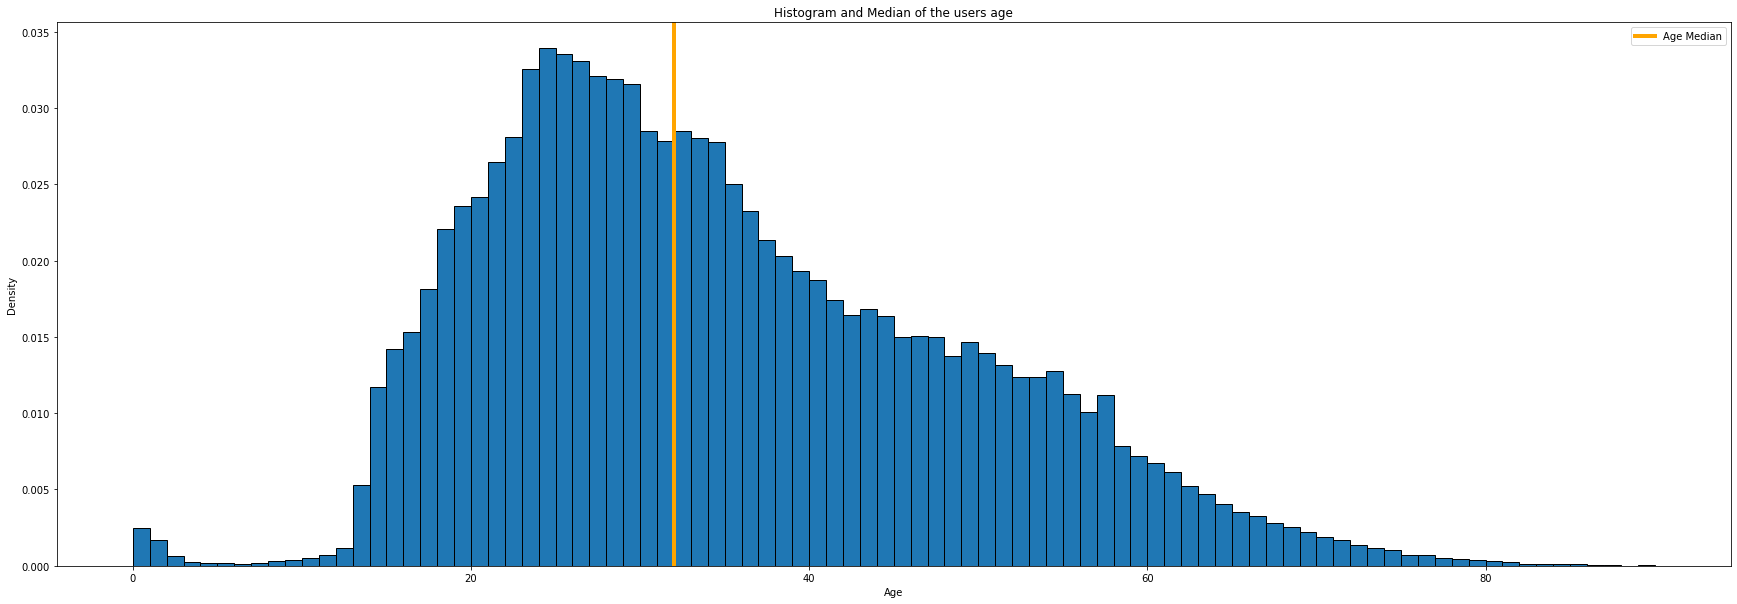

In [17]:
age_values = list(age_counts.values())
age_bins = list(age_counts.keys())
plt.hist(age_list_filtered.collect(),bins=age_bins,density=True, edgecolor='black')
plt.axvline(int(np.median(age_list_filtered.collect())),color='orange',label='Age Median',linewidth=4)
plt.legend()
plt.title('Histogram and Median of the users age')
plt.ylabel('Density')
plt.xlabel('Age')
fig=plt.gcf()
fig.set_size_inches(30,10)